# Chapter 7 Exercises

In [2]:
import matplotlib.pyplot as plt
import pymc3 as pm
import numpy as np
from scipy import stats
import arviz as az
import pandas as pd
from scipy.special import expit as logistic


## Exercise 1

In [4]:
def exp_quad_kernel(x, knots, ℓ=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*ℓ**2)) for k in knots])

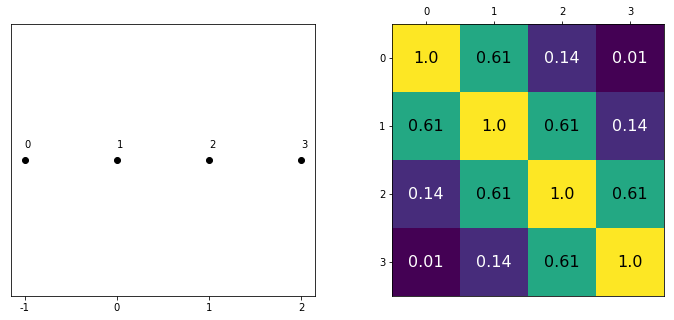

In [3]:
data = np.array([-1, 0, 1, 2])

def plot_covariance(data):
    """Functionalize the code block from the chapter to try different data"""
    cov = exp_quad_kernel(data, data, 1)

    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax = np.ravel(ax)

    ax[0].plot(data, np.zeros_like(data), 'ko')
    ax[0].set_yticks([])
    for idx, i in enumerate(data):
        ax[0].text(i, 0+0.005, idx)
    ax[0].set_xticks(data)
    ax[0].set_xticklabels(np.round(data, 2))
    #ax[0].set_xticklabels(np.round(data, 2), rotation=70)

    ax[1].grid(False)
    im = ax[1].imshow(cov)
    colors = ['w', 'k']
    for i in range(len(cov)):
        for j in range(len(cov)):
            ax[1].text(j, i, round(cov[i, j], 2),
                       color=colors[int(im.norm(cov[i, j]) > 0.5)],
                       ha='center', va='center', fontdict={'size': 16})
    ax[1].set_xticks(range(len(data)))
    ax[1].set_yticks(range(len(data)))
    ax[1].xaxis.tick_top()
plot_covariance(data)

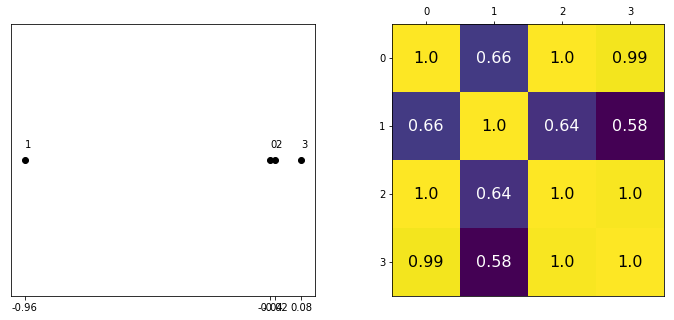

In [4]:
data = np.random.normal(size=4)
plot_covariance(data)

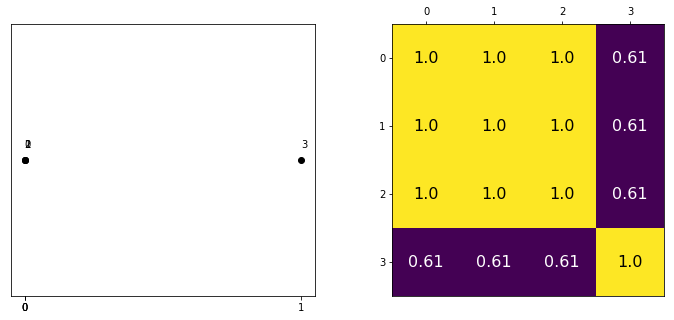

In [5]:
data = np.array([0, 0, 0,1])
plot_covariance(data)

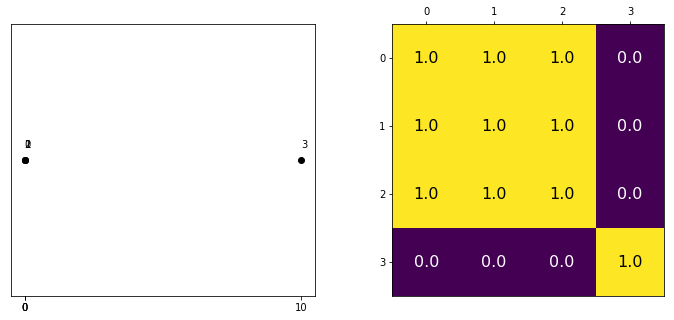

In [6]:
data = np.array([0, 0, 0,10])
plot_covariance(data)

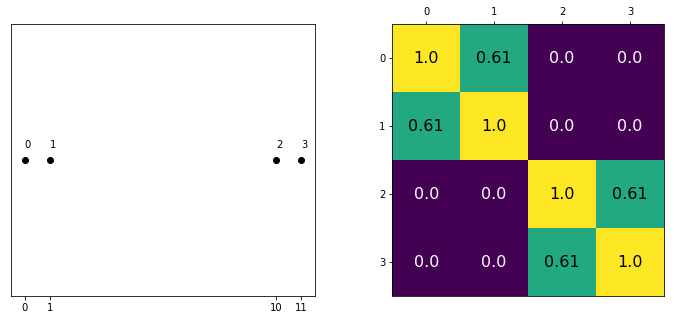

In [7]:
data = np.array([0, 1, 10,11])
plot_covariance(data)

We can validate the kernel value between the points 10 and 11 by using the calculation below. This should match the value in the image

In [8]:
np.exp(-(11-10)**2 / (2*1**2))

0.6065306597126334

## Exercise 2
Rerun the code generating Figure 7.3 and increase the number of samples obtained from the GP-prior to around 200. In the original figure the number of
samples is 2. Which is the range of the generated Y values?

In [ ]:
def exp_quad_kernel(x, knots, ℓ=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*ℓ**2)) for k in knots])

Text(-0.03, 0.5, 'f(x)')

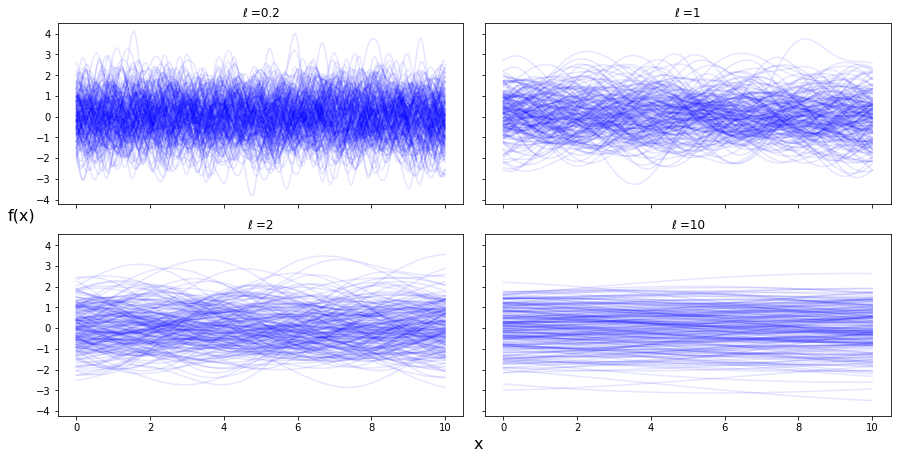

In [14]:
np.random.seed(24)
test_points = np.linspace(0, 10, 200)
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True, constrained_layout=True)
ax = np.ravel(ax)

for idx, ℓ in enumerate((0.2, 1, 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, ℓ)
    vals = stats.multivariate_normal.rvs(cov=cov, size=200).T
    ax[idx].plot(test_points, vals, alpha=.1, c='b')
    ax[idx].set_title(f'ℓ ={ℓ}')
fig.text(0.51, -0.03, 'x', fontsize=16)
fig.text(-0.03, 0.5, 'f(x)', fontsize=16)

The range of Y looks to range from -3 to 3 

## Exercise 3

For the generated plot in the previous exercise. Compute the standard deviation
for the values of Y at each point. Do this in the following form:
* Visually, just observing the plots
* Directly from the values generated from stats.multivariate_normal.rvs
* By inspecting the covariance matrix (if you have doubts go back to Exercise 1)

Did the values you get from these 3 methods agree?

In [105]:
cov = exp_quad_kernel(test_points, test_points, 10)
vals = stats.multivariate_normal.rvs(cov=cov, size=1000)


1.0069400954007475

First we'll calculate the variance of all y values at X=0 to see that we get a variance of 1

In [106]:
np.var(vals.T[1,:])

1.0139283557256664

Next we'll inspect the covariance matrix for the covariance for (x=0, x=0), again seeing that the covariance for the same x location is 1

In [108]:
cov[0][0]

1.0

Finally visually inspecting the plot it looks like the range of the y values is mostly around -3 to 3. We can simulate a gaussian distribution with a variance of 1 to double check our estimation of the range.

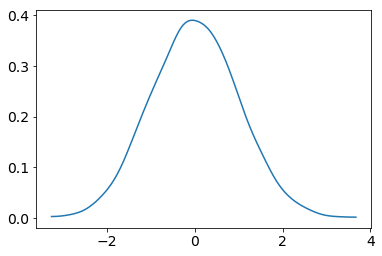

In [113]:
az.plot_kde(stats.norm(0, scale=np.sqrt(1)).rvs(10000))

## Exercise 4
Re-run the model model_reg and get new plots but using as `test_points X_new np.linspace(np.floor(x.min()), 20, 100)[:,None]` . What did you observed How is this related to the specification of the GP-prior?

In [9]:
np.random.seed(42)
x = np.random.uniform(0, 10, size=15)
y = np.random.normal(np.sin(x), 0.1)
X = x[:, None]

with pm.Model() as model_reg:
    # hyperprior for lengthscale kernel parameter
    ℓ = pm.Gamma('ℓ', 2, 0.5)
    # instanciate a covariance function
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    # instanciate a GP prior
    gp = pm.gp.Marginal(cov_func=cov)
    # prior
    ϵ = pm.HalfNormal('ϵ', 25)
    # likelihood
    y_pred = gp.marginal_likelihood('y_pred', X=X, y=y, noise=ϵ)
    trace_reg = pm.sample(2000)

/home/canyon/miniconda3/envs/pymc4/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/canyon/miniconda3/envs/pymc4/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/canyon/miniconda3/envs/pymc4/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for 

/home/canyon/miniconda3/envs/pymc4/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
  0%|          | 0/8000 [00:00<?, ?it/s]/home/canyon/miniconda3/envs/pymc4/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/canyon/miniconda3/envs/pymc4/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

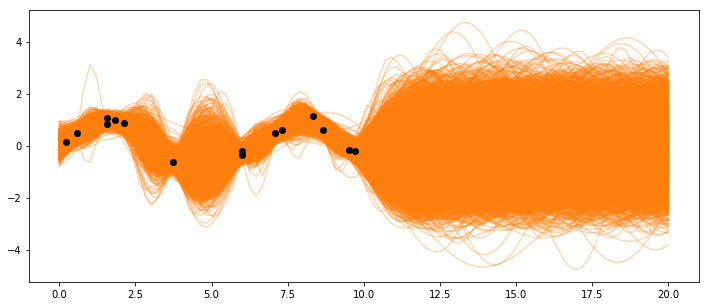

In [10]:
X_new = np.linspace(np.floor(x.min()), 20, 100)[:,None]

with model_reg:
    # conditional distribution evaluated over new input locations
    f_pred = gp.conditional("f_pred", X_new)
    # samples from the posterior predictive distribution evaluated at the X_new values
    pred_samples = pm.sample_posterior_predictive(trace_reg, vars=[f_pred])

_, ax = plt.subplots(figsize=(12,5))
ax.plot(X_new, pred_samples["f_pred"].T, "C1-", alpha=0.3)
ax.plot(X, y, "ko");


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16bd9142e8>,
      dtype=object)

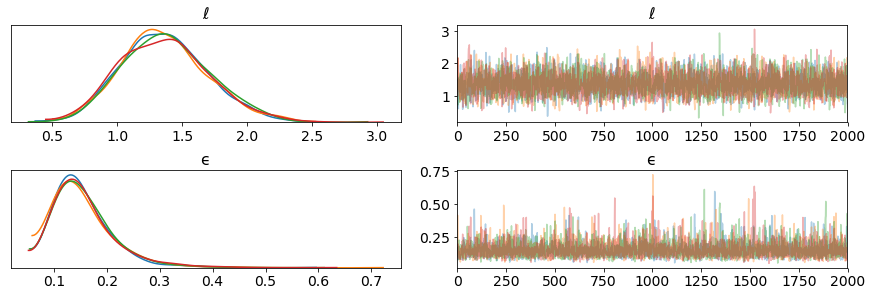

In [13]:
az.plot_trace(trace_reg)

# Exercise 5
Go back to exercise 1, but this time use a linear kernel (see the accompanying code for a linear kernel)

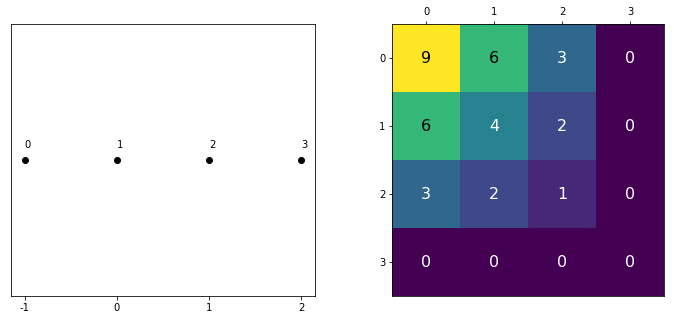

In [14]:
data = np.array([-1, 0, 1, 2])

def linear_kernel(x, knots):
    """ linear kernel """
    return np.array([(x - 2) * (k - 2) for k in knots])

def plot_covariance(data):
    """Functionalize the code block from the chapter to try different data"""
    cov = linear_kernel(data, data)

    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax = np.ravel(ax)

    ax[0].plot(data, np.zeros_like(data), 'ko')
    ax[0].set_yticks([])
    for idx, i in enumerate(data):
        ax[0].text(i, 0+0.005, idx)
    ax[0].set_xticks(data)
    ax[0].set_xticklabels(np.round(data, 2))
    #ax[0].set_xticklabels(np.round(data, 2), rotation=70)

    ax[1].grid(False)
    im = ax[1].imshow(cov)
    colors = ['w', 'k']
    for i in range(len(cov)):
        for j in range(len(cov)):
            ax[1].text(j, i, round(cov[i, j], 2),
                       color=colors[int(im.norm(cov[i, j]) > 0.5)],
                       ha='center', va='center', fontdict={'size': 16})
    ax[1].set_xticks(range(len(data)))
    ax[1].set_yticks(range(len(data)))
    ax[1].xaxis.tick_top()
plot_covariance(data)

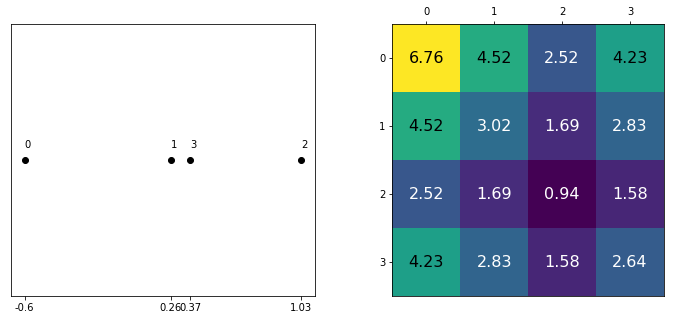

In [15]:
data = np.random.normal(size=4)
plot_covariance(data)

# Exercise 7
Run a logistic regression model for the space_flu data. What do you see? Can you explain the result?

In [16]:
df_sf = pd.read_csv('../code/data/space_flu.csv')
age = df_sf.age.values
space_flu = df_sf.space_flu.values

In [17]:
# Linear Model
with pm.Model() as space_flu_model:
    α = pm.Normal("α", 0,1)
    β = pm.Normal("β", 0,1)
    
    μ = α + pm.math.dot(age, β)
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    
    bd = pm.Deterministic('bd', -α/β)
    
    y = pm.Bernoulli("y", p=θ, observed=space_flu)
    flu_logistic_trace = pm.sample(4000)
    flu_logistic_samples  = pm.sample_posterior_predictive(flu_logistic_trace, vars=[θ,y], samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
100%|██████████| 1000/1000 [00:00<00:00, 3894.51it/s]


Text(0, 0.5, 'θ')

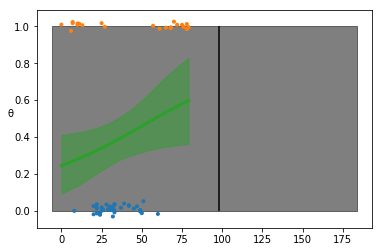

In [18]:
# Plot decision boundary
plt.vlines(flu_logistic_trace['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(flu_logistic_trace['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

# Plot observed value
plt.scatter(age, np.random.normal(space_flu, 0.02), marker='.', color=[f'C{x}' for x in space_flu])

# Plot mean of parameter estimate
theta = flu_logistic_trace['θ'].mean(axis=0)
idx = np.argsort(age)
plt.plot(age[idx], theta[idx], color='C2', lw=3)

# Plot confidence of parameter estimate
az.plot_hpd(age, flu_logistic_trace['θ'], color='C2')

plt.ylabel('θ', rotation=0)

## Exercise 8
Change the logistic regression model in order to fit the data. Tip, use an order two polynomial.

In [19]:
df_sf = pd.read_csv('../code/data/space_flu.csv')
age = df_sf.age.values
space_flu = df_sf.space_flu.values


In [20]:
# Quadratic Model
with pm.Model() as space_flu_model:
    α = pm.Normal("α", 0,1)
    β = pm.Normal("β", 0,1, shape=2)
    
    # Quadratic Parmetarization is in this line
    μ = α + pm.math.dot(age, β[0]) + pm.math.dot(age**2, β[1])
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    
    # bd = pm.Deterministic('bd', -α/β)
    
    y = pm.Bernoulli("y", p=θ, observed=space_flu)
    flu_logistic_trace = pm.sample(4000)
    flu_logistic_samples  = pm.sample_posterior_predictive(flu_logistic_trace, vars=[θ,y], samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 18000/18000 [00:12<00:00, 1474.98draws/s]
The acceptance probability does not match the target. It is 0.8979909354540494, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8789797304019081, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9055478985631059, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9182246730128105, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 1000/1000 [00:00<00:00, 3940.01it/s]


Text(0, 0.5, 'θ')

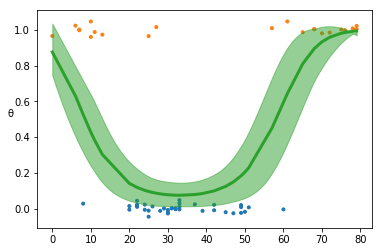

In [21]:
# Plot observed value
plt.scatter(age, np.random.normal(space_flu, 0.02), marker='.', color=[f'C{x}' for x in space_flu])

# Plot mean of parameter estimate
theta = flu_logistic_trace['θ'].mean(axis=0)
idx = np.argsort(age)
plt.plot(age[idx], theta[idx], color='C2', lw=3)

# Plot confidence of parameter estimate
az.plot_hpd(age, flu_logistic_trace['θ'], color='C2')

plt.ylabel('θ', rotation=0)

## Exercise 9
Compare the model for the coal mining disaster with the one from the PyMC3
documentation ( https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters). Describe the differences between both models in terms of model-specification and results.

## Question:
The model in the book and the model from PyMC3 docs answer different questions

PyMC3 docs answer question: When did rate of coal mining diaster change, specifically done by estimating three things, rate prior to change event, and rate post change event, and change event time
Book estimates what is rate of coal mining disasters at any point in time. It does not answer the question of when was an event that led to change in rate

Is my understanding correct